<a href="https://colab.research.google.com/github/overfit-ir/persian-twitter-ner/blob/master/quality_of_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/overfit-ir/persian-twitter-ner.git

Cloning into 'persian-twitter-ner'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1906 (delta 51), reused 61 (delta 25), pack-reused 1807
Receiving objects: 100% (1906/1906), 19.64 MiB | 18.74 MiB/s, done.
Resolving deltas: 100% (1398/1398), done.


In [2]:
import os

In [3]:
tweets1 = []
tweet = []
with open('persian-twitter-ner/twitter_data/kappa_test_data/test_data1.txt', 'r') as file:
    for line_number, line in enumerate(file.readlines()):
        if line != '\n':
            tweet.append(line.replace('\n', '').split('\t'))
        else:
            tweets1.append(tweet)
            tweet = []

In [4]:
tweets2 = []
tweet = []
with open('persian-twitter-ner/twitter_data/kappa_test_data/test_data12.txt', 'r') as file:
    for line_number, line in enumerate(file.readlines()):
        if line != '\n':
            tweet.append(line.replace('\n', '').split('\t'))
        else:
            tweets2.append(tweet)
            tweet = []

In [5]:
tags1 = [x[1] for tweet in tweets1 for x in tweet ]
tags2 = [x[1] for tweet in tweets2 for x in tweet ]

In [6]:
diff = [0 if x==y else 1 for x,y in zip(tags1, tags2)]

In [7]:
sum(diff)

76

In [8]:
len([x  for x in tags1 if x != 'O'])

983

In [9]:
len(tags1)

9674

### KAPPA

In [22]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import pandas as pd

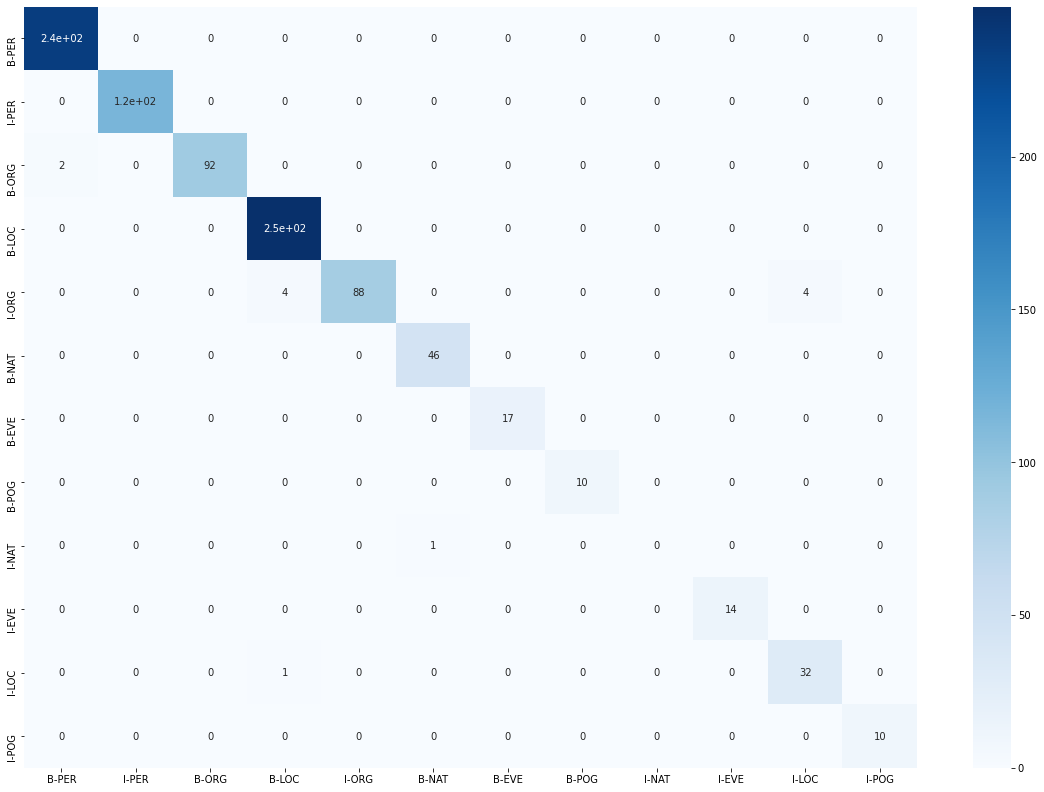

In [21]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(tags1, tags2,['B-PER', 'I-PER', 'B-ORG', 'B-LOC', 'I-ORG', 'B-NAT', 'B-EVE',
       'B-POG', 'I-NAT', 'I-EVE', 'I-LOC', 'I-POG'])
df_cm = pd.DataFrame(array, index = ['B-PER', 'I-PER', 'B-ORG', 'B-LOC', 'I-ORG', 'B-NAT', 'B-EVE',
       'B-POG', 'I-NAT', 'I-EVE', 'I-LOC', 'I-POG'],
                  columns = ['B-PER', 'I-PER', 'B-ORG', 'B-LOC', 'I-ORG', 'B-NAT', 'B-EVE',
       'B-POG', 'I-NAT', 'I-EVE', 'I-LOC', 'I-POG'])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, cmap='Blues')

In [23]:
cohen_kappa_score(tags1, tags2, ['B-PER', 'I-PER', 'B-ORG', 'B-LOC', 'I-ORG', 'B-NAT', 'B-EVE',
       'B-POG', 'I-NAT', 'I-EVE', 'I-LOC', 'I-POG'])

0.984105343759293

In [24]:
cohen_kappa_score(tags1, tags2, ['B-PER', 'I-PER', 'B-ORG', 'O', 'B-LOC', 'I-ORG', 'B-NAT', 'B-EVE',
       'B-POG', 'I-NAT', 'I-EVE', 'I-LOC', 'I-POG'])

0.9577135146174927